# Testing Assumptions of Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
# column headings
columns = ['age', 'sex', 'bmi', 'average_bp', 's1', 's2', 's3', 's4', 's5', 's6']
# load regression dataset
diabetes, target = load_diabetes(return_X_y=True)
diabetes = pd.DataFrame(data=diabetes, columns=columns)
print(diabetes.shape)
diabetes.head()

(442, 10)


,age,sex,bmi,average_bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
# add target to dataframe
diabetes['target'] = target
diabetes.head()

,age,sex,bmi,average_bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Assumption: Linear Relationship
We assume the features have a linear relationship with the target.

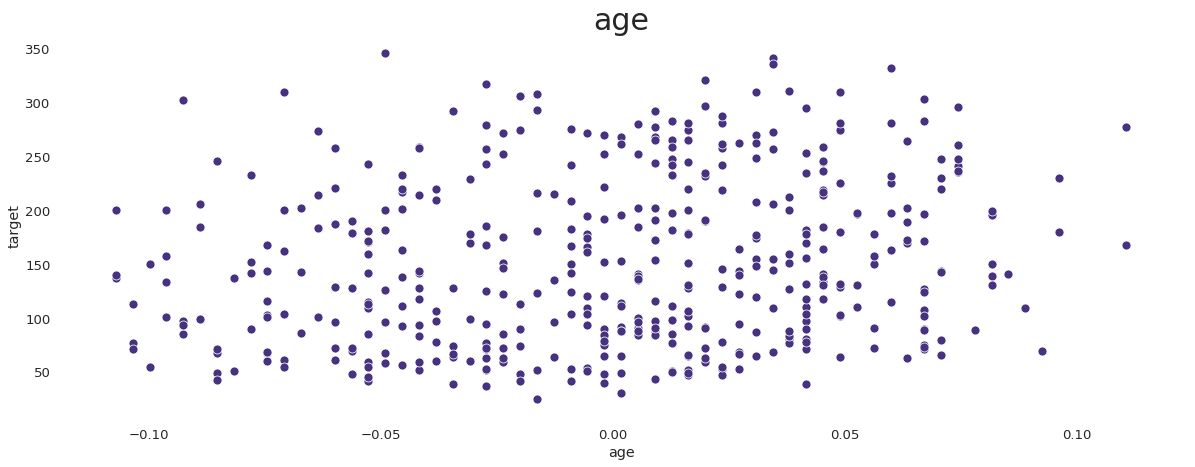

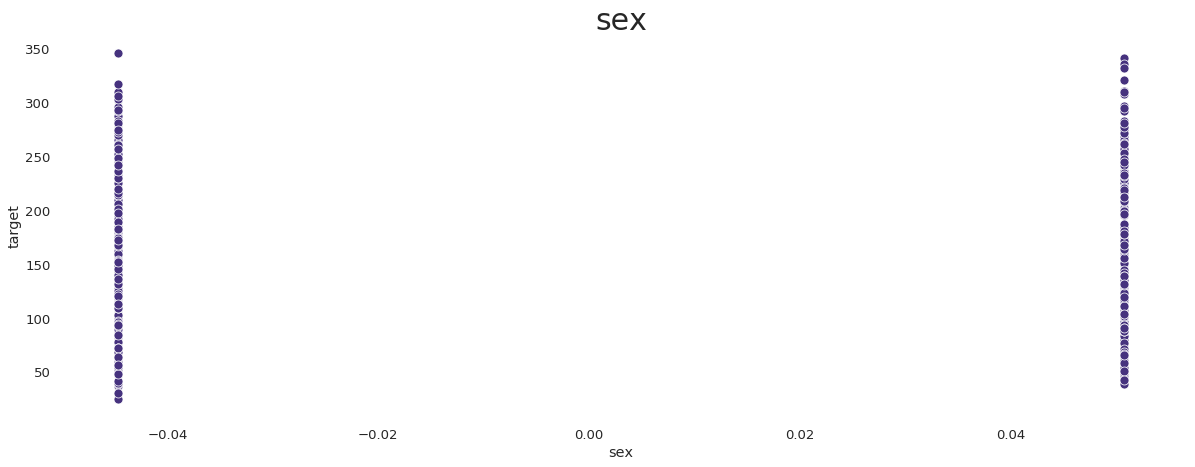

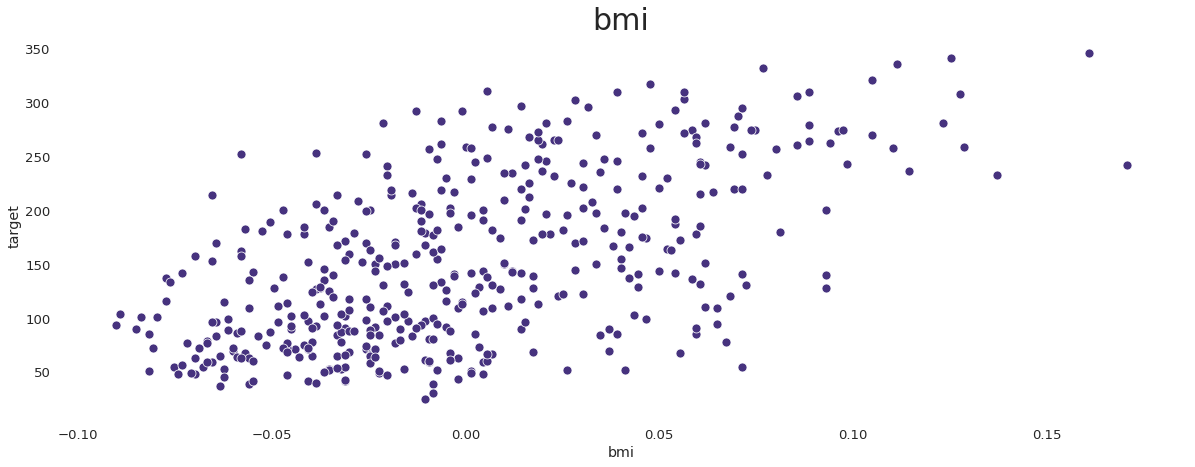

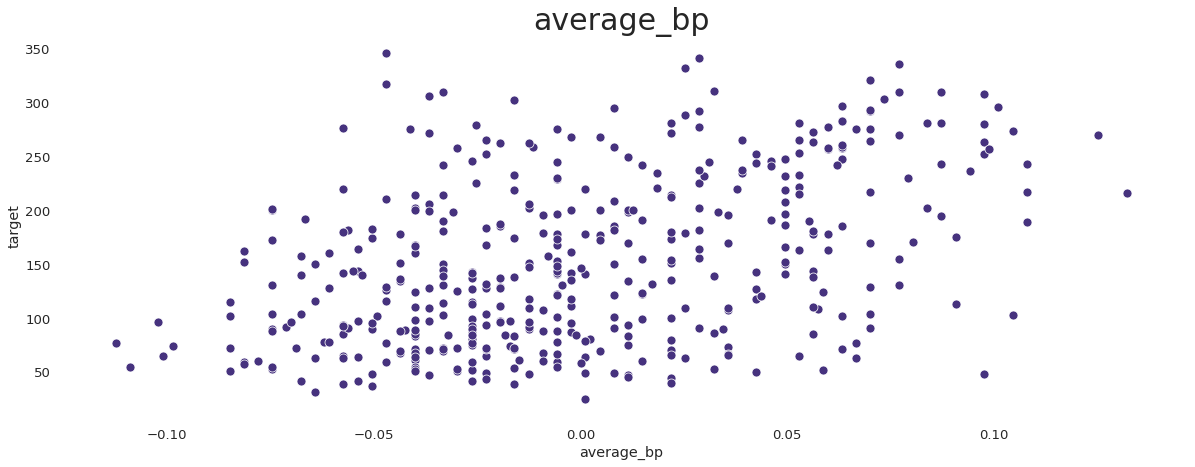

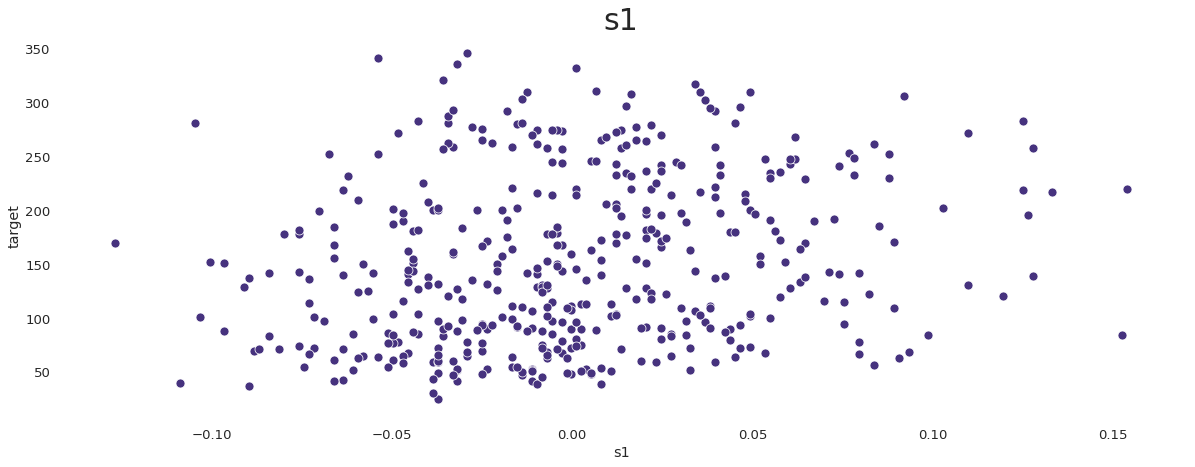

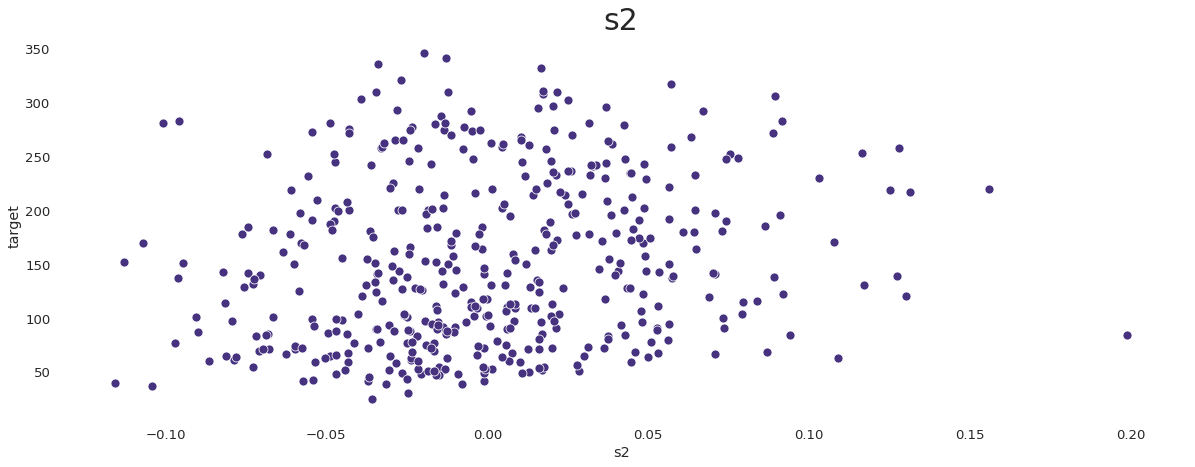

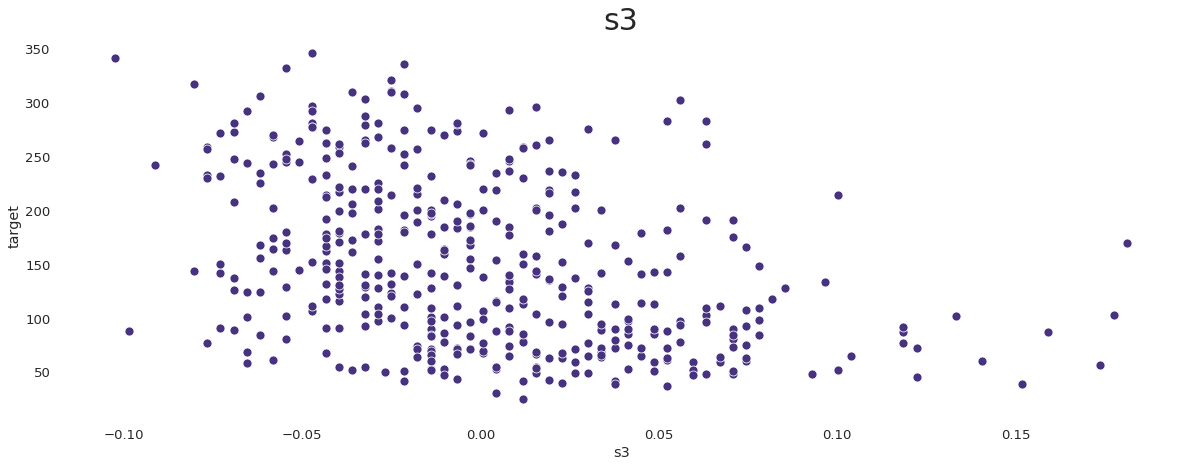

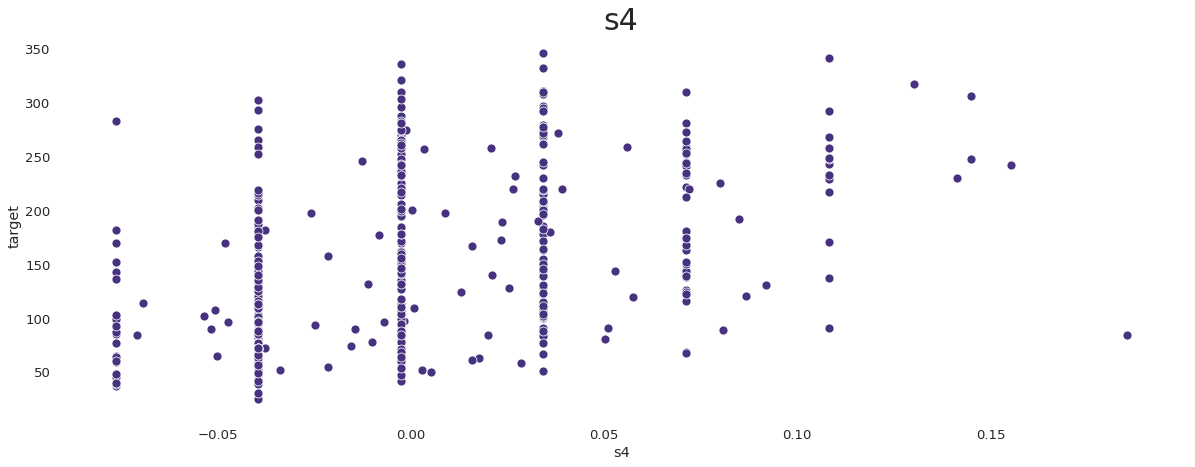

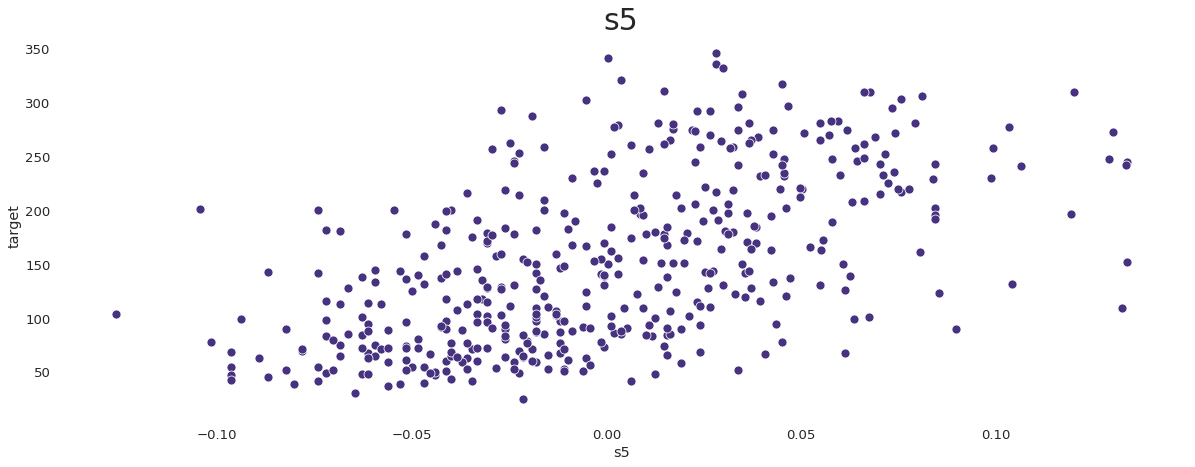

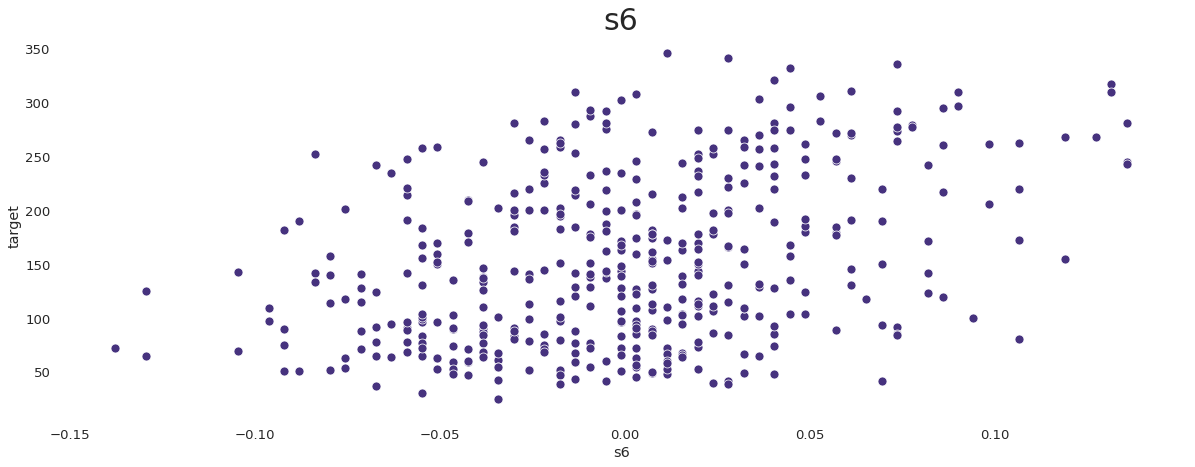

In [5]:
for col in diabetes.columns:
    if col != 'target':
        sns.scatterplot(x=diabetes[col], y=diabetes.target)
        plt.title(col, fontsize=30)
        sns.despine(left=True, bottom=True)
        plt.show()

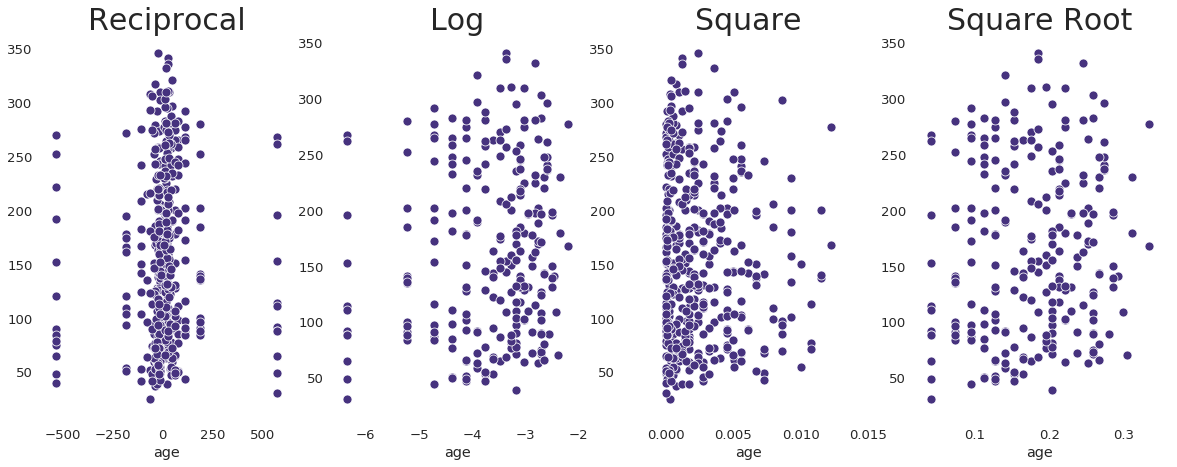

In [6]:
# visualize potential nonlinear transformations for age
fig, ax = plt.subplots(nrows=1, ncols=4)

plt.subplot(141)
sns.scatterplot(x=1/(diabetes.age), y=target)
plt.title('Reciprocal', fontsize=30)
sns.despine(left=True, bottom=True)

plt.subplot(142)
sns.scatterplot(x=np.log(diabetes.age), y=target)
plt.title('Log', fontsize=30)
sns.despine(left=True, bottom=True)

plt.subplot(143)
sns.scatterplot(x=(diabetes.age)**2, y=target)
plt.title('Square', fontsize=30)
sns.despine(left=True, bottom=True)

plt.subplot(144)
sns.scatterplot(x=np.sqrt(diabetes.age), y=target)
plt.title('Square Root', fontsize=30)
sns.despine(left=True, bottom=True)
plt.show()

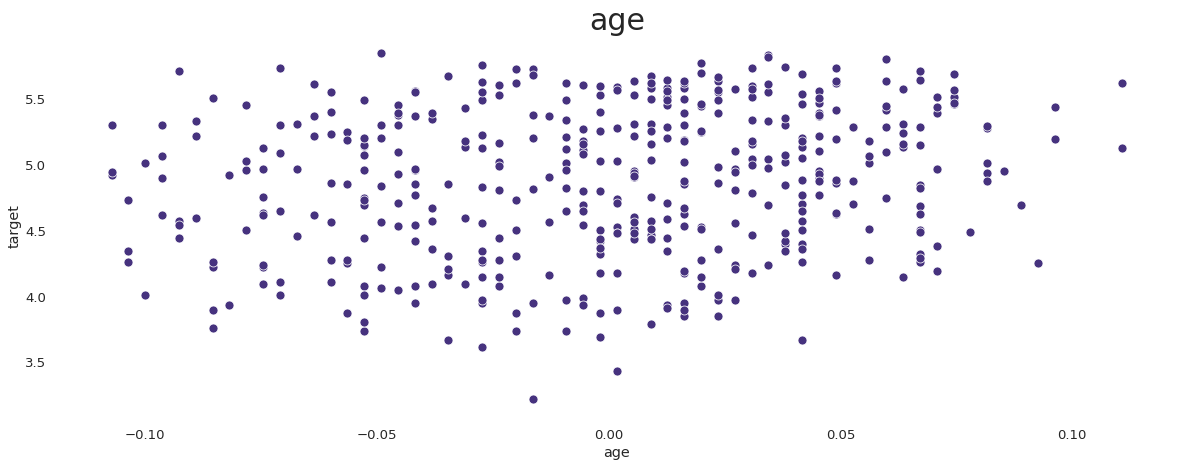

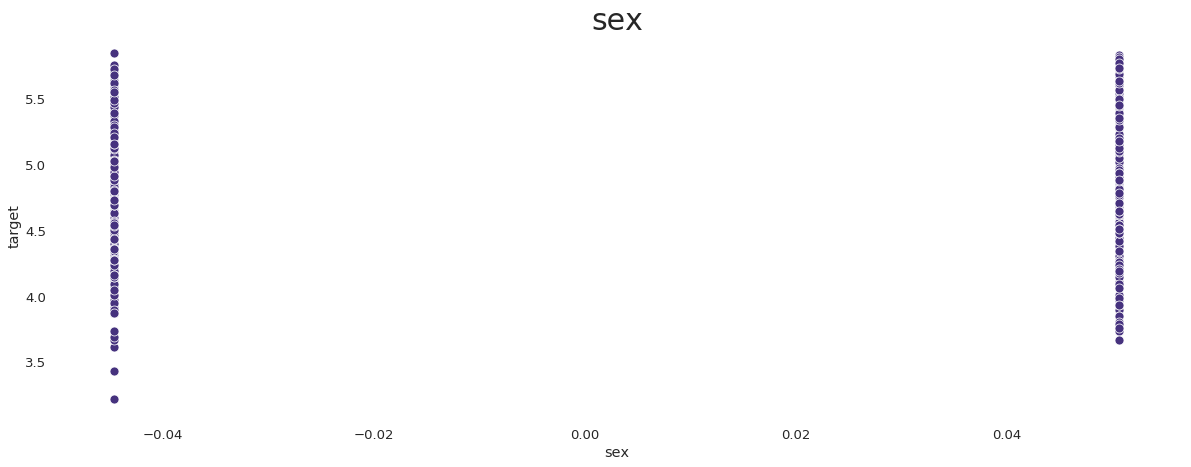

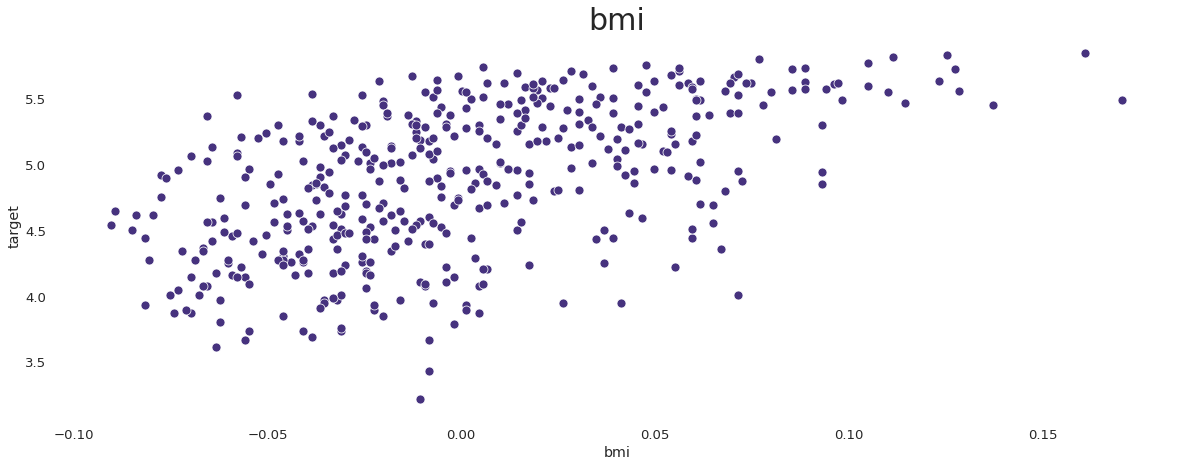

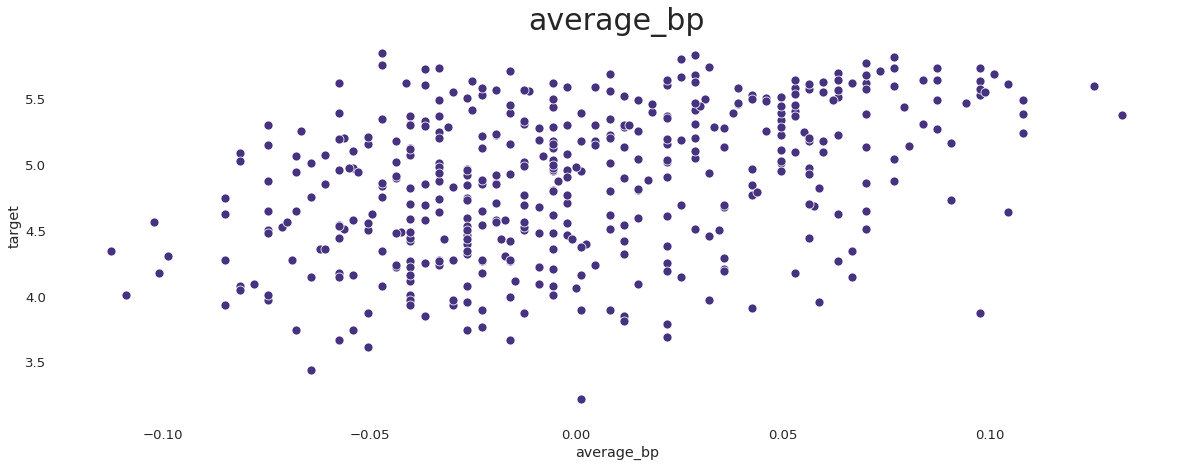

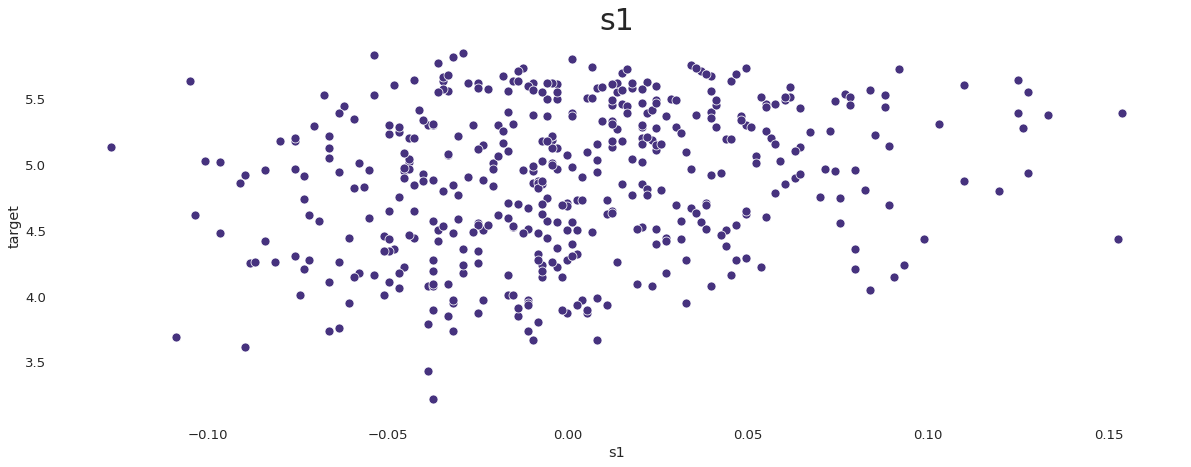

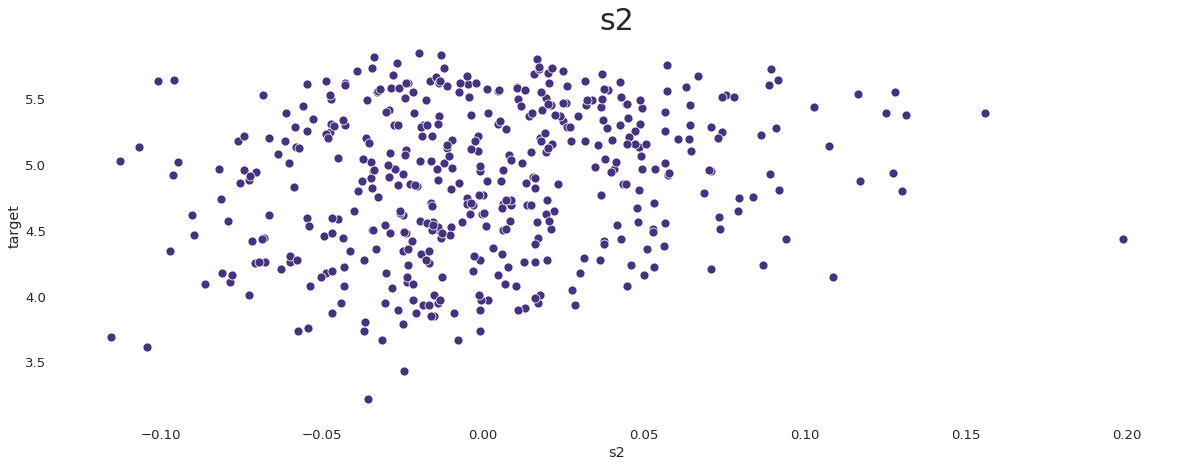

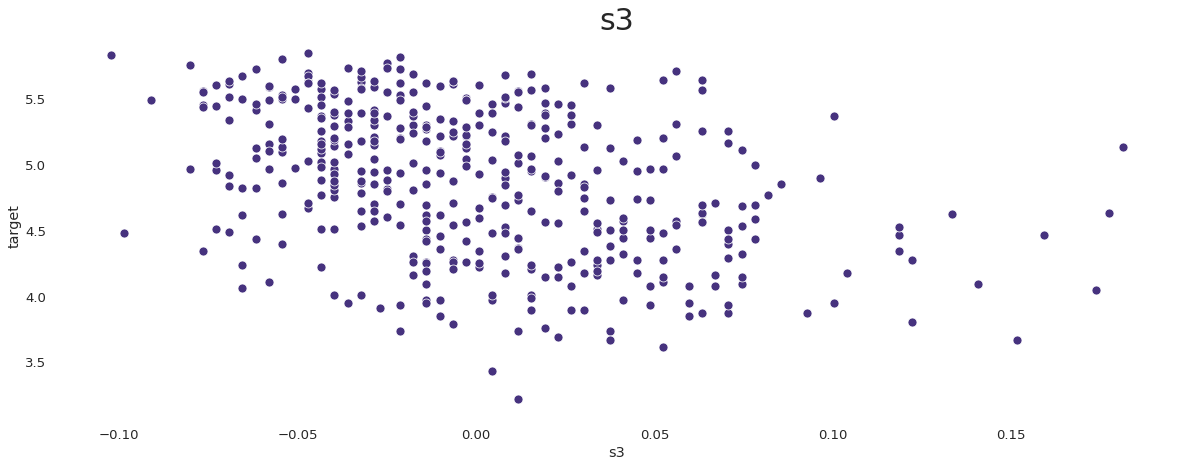

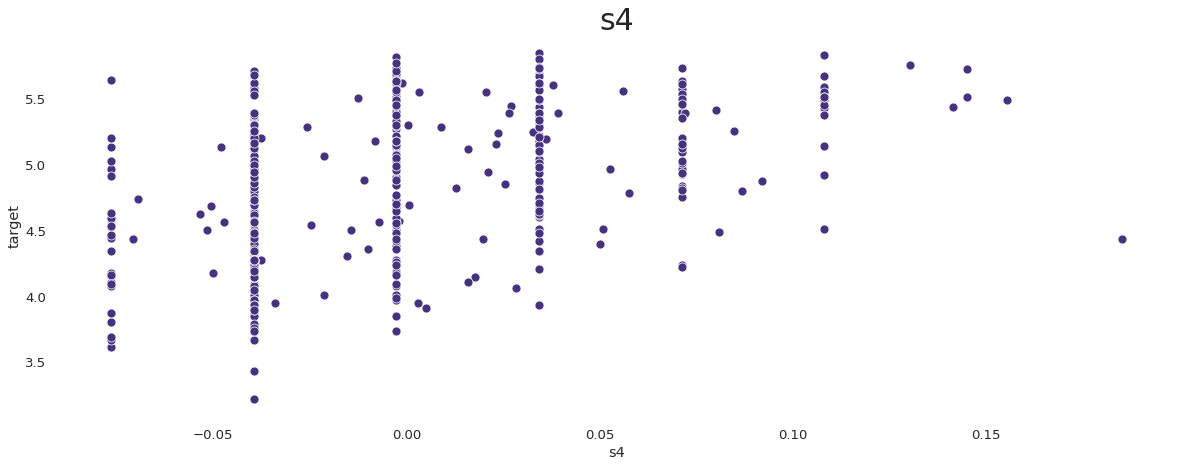

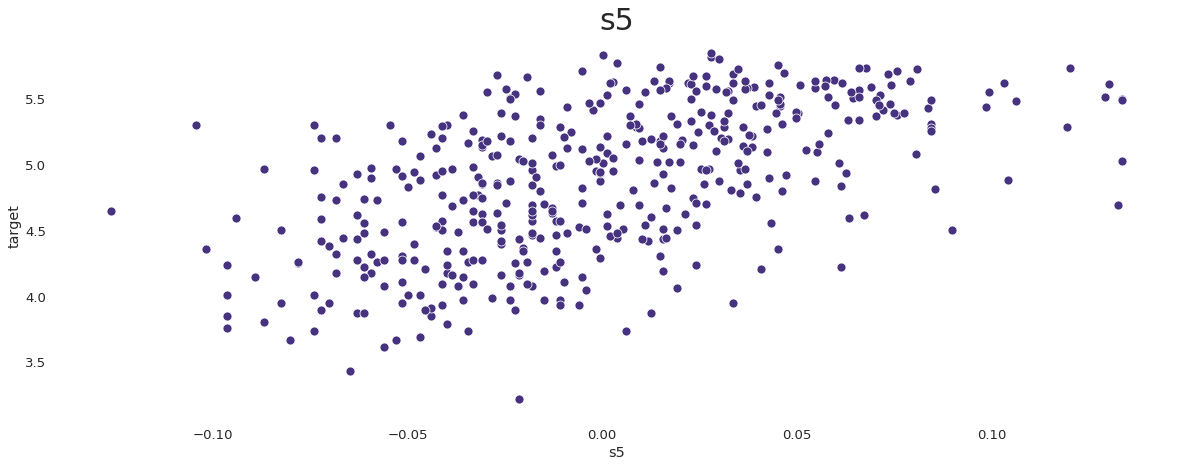

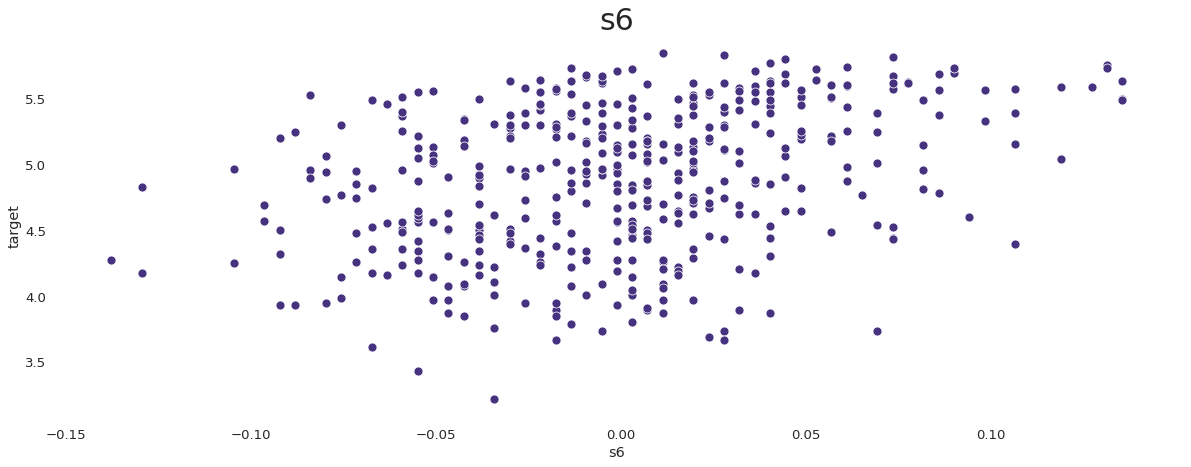

In [7]:
for col in diabetes.columns:
    if col != 'target':
        sns.scatterplot(x=diabetes[col], y=np.log(diabetes.target))
        plt.title(col, fontsize=30)
        sns.despine(left=True, bottom=True)
        plt.show()

## Assumption: Multivariate Normality

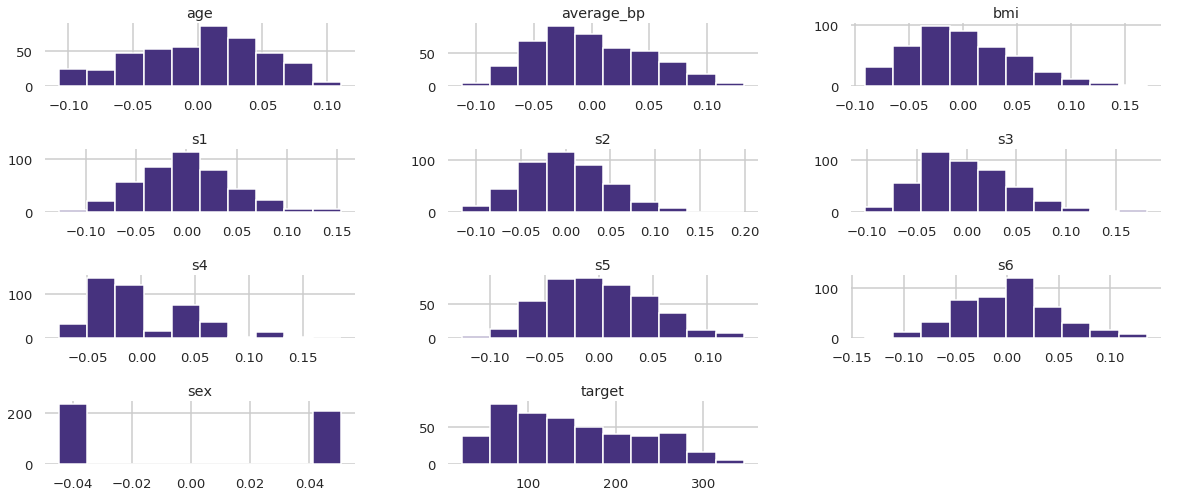

In [8]:
# view histogram of each feature
diabetes.hist()
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace=1, top=1)
plt.show()

In [9]:
# using normaltest to verify normality quantitatively 
for col in diabetes.columns:
    print(f'{col}:  {sts.normaltest(diabetes[col])}\n')

age:  NormaltestResult(statistic=22.980727382695587, pvalue=1.0228182153992174e-05)

sex:  NormaltestResult(statistic=1.217042257157512, pvalue=0.544155009610152)

bmi:  NormaltestResult(statistic=23.665619193944988, pvalue=7.262331793832793e-06)

average_bp:  NormaltestResult(statistic=15.62072005916215, pvalue=0.000405512025210947)

s1:  NormaltestResult(statistic=11.2085275549357, pvalue=0.003682130413975457)

s2:  NormaltestResult(statistic=18.03128290368439, pvalue=0.00012149451358986439)

s3:  NormaltestResult(statistic=47.88065264242953, pvalue=4.007267957312441e-11)

s4:  NormaltestResult(statistic=36.31436098718564, pvalue=1.3014776207789513e-08)

s5:  NormaltestResult(statistic=6.463554493369442, pvalue=0.0394872577910996)

s6:  NormaltestResult(statistic=4.295701660173041, pvalue=0.11673477122976696)

target:  NormaltestResult(statistic=64.15092254678288, pvalue=1.1743678801847827e-14)



The only continous feature with a p value of 0.05 or greater is s6 with a p value of 0.12.

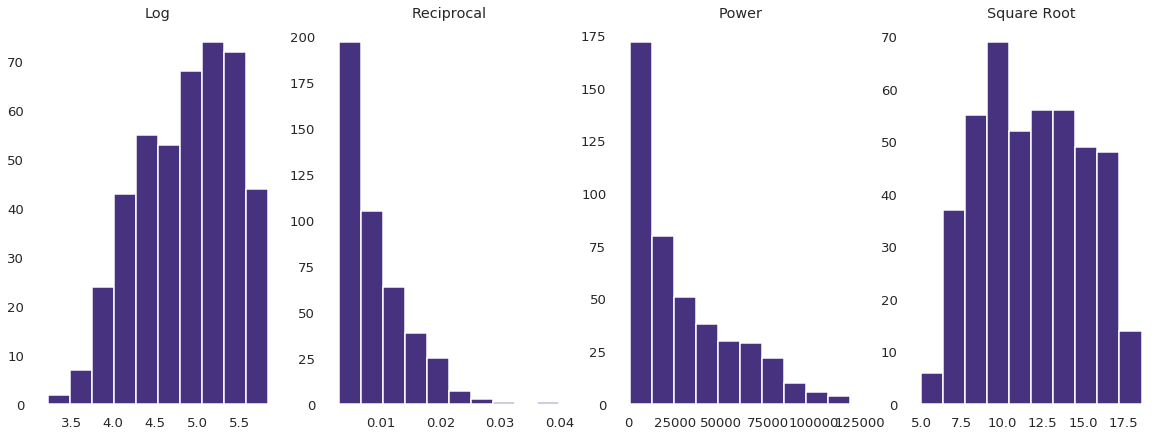

In [10]:
# visualize transformations of the target that may improve normality
fig, ax = plt.subplots(nrows=1, ncols=4)

plt.subplot(141)
plt.hist(np.log(diabetes.target))
sns.despine(left=True, bottom=True)
plt.title('Log')

plt.subplot(142)
plt.hist(1/(diabetes.target))
sns.despine(left=True, bottom=True)
plt.title('Reciprocal')

plt.subplot(143)
plt.hist((diabetes.target)**2)
sns.despine(left=True, bottom=True)
plt.title('Power')

plt.subplot(144)
plt.hist(np.sqrt(diabetes.target))
sns.despine(left=True, bottom=True)
plt.title('Square Root')

plt.show()

In [11]:
diabetes.sex.value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

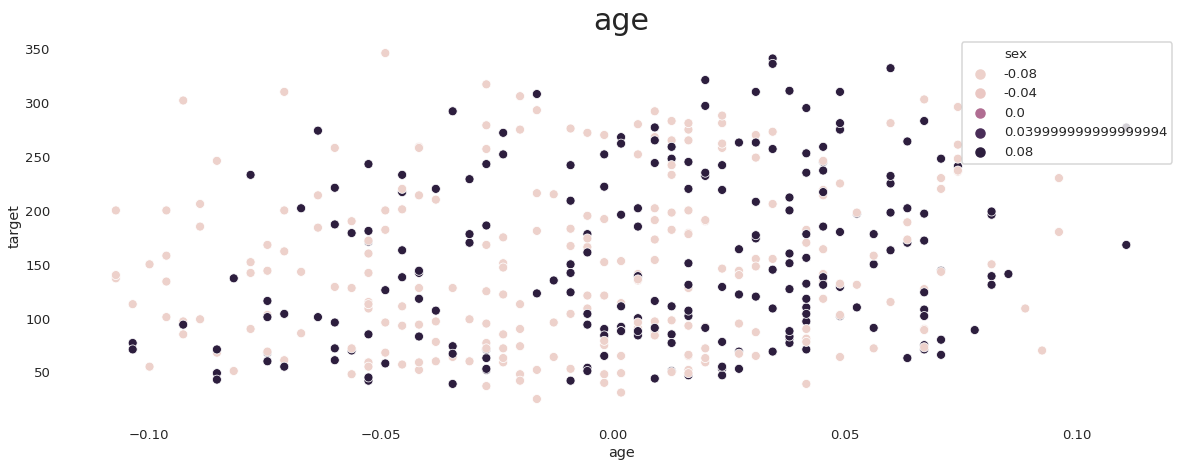

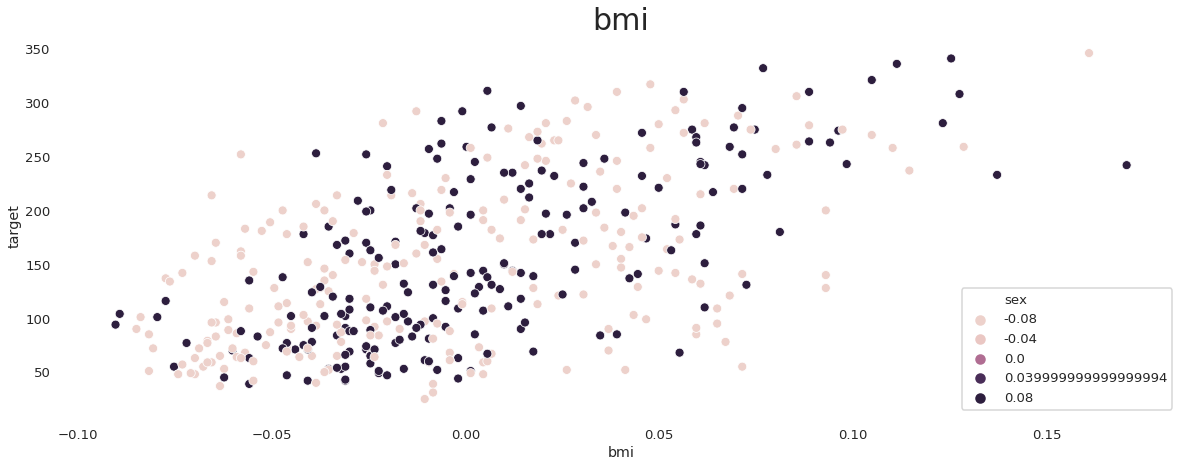

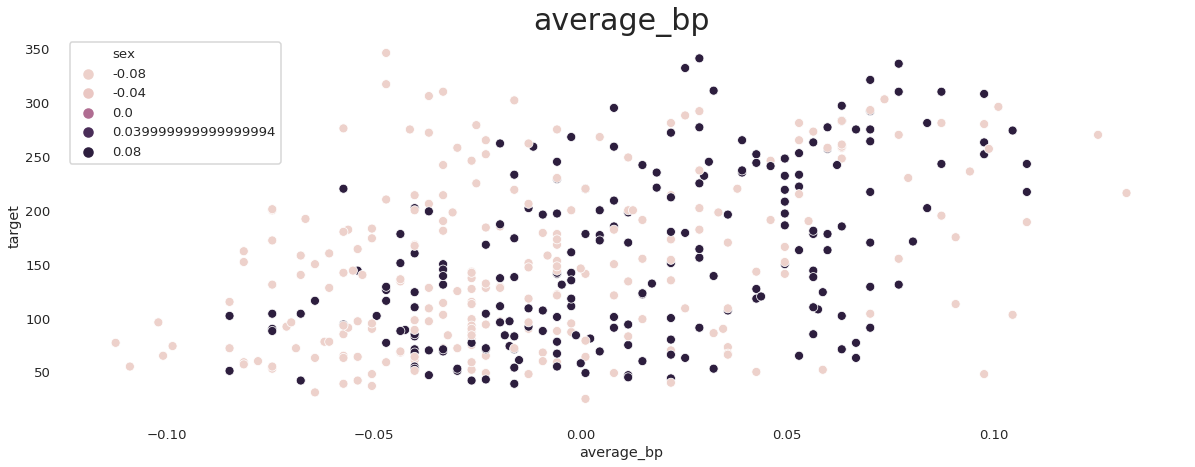

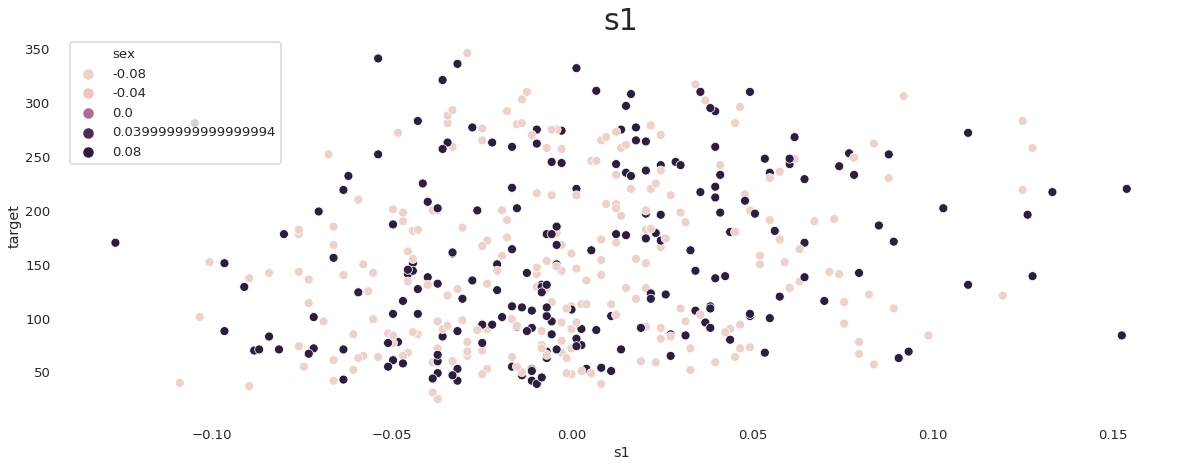

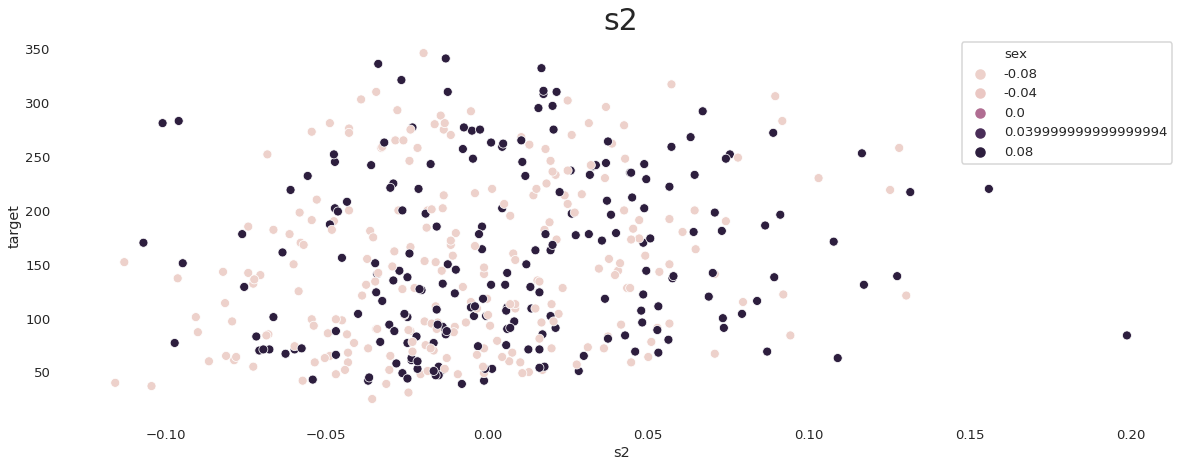

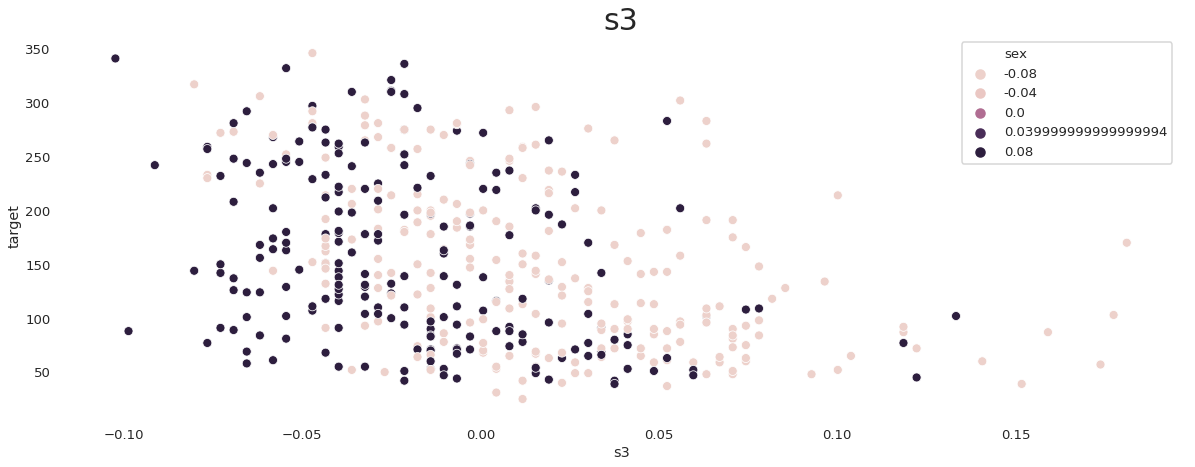

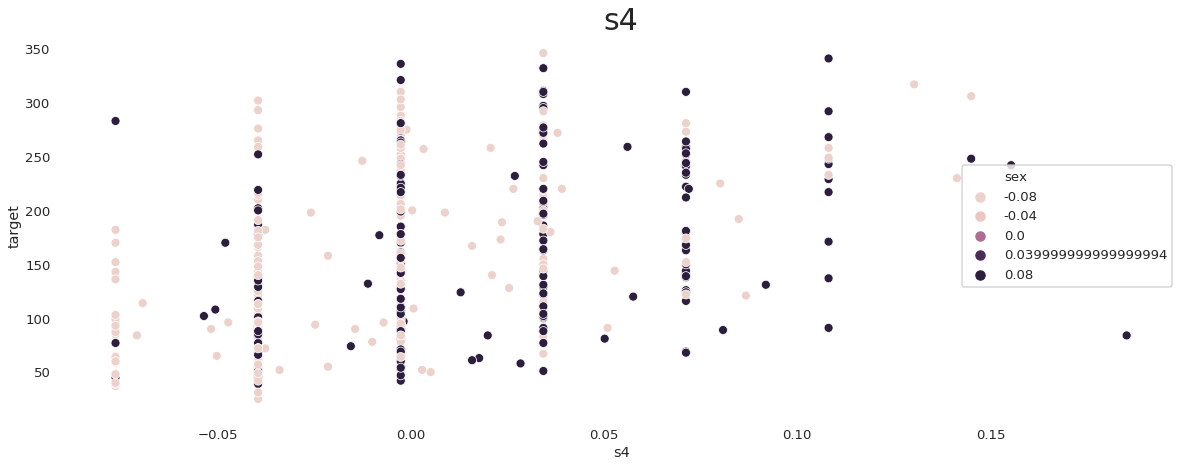

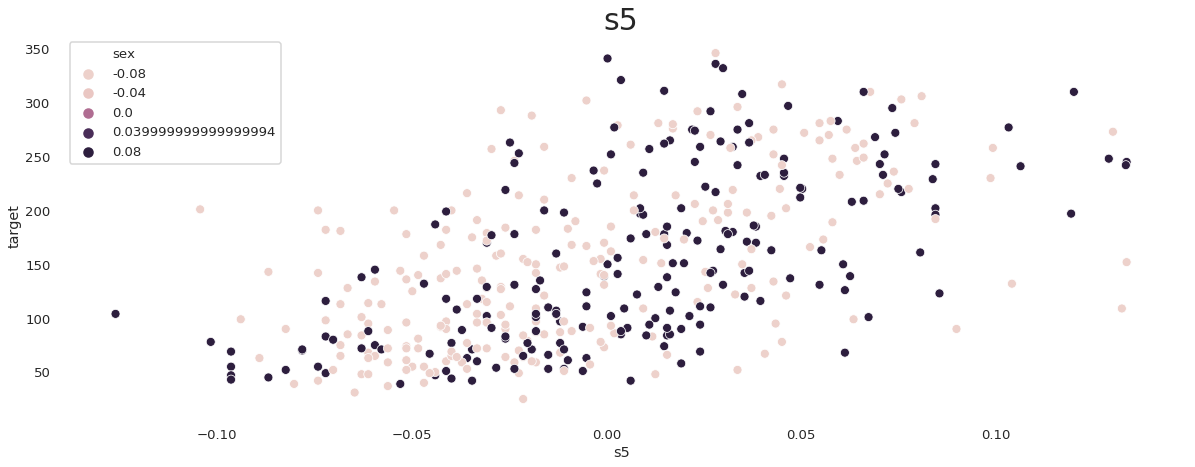

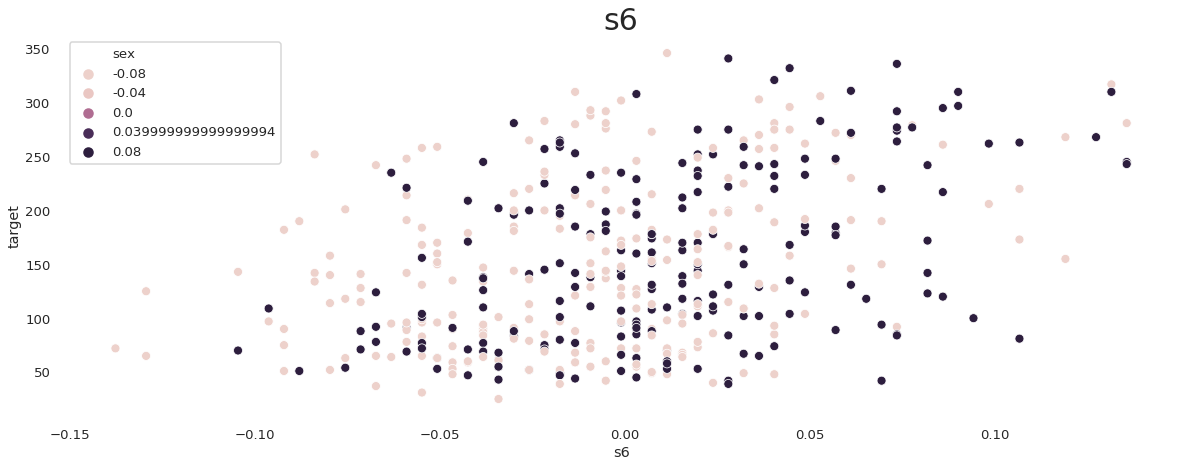

In [12]:
for col in diabetes.columns:
    if col != 'target' and col != 'sex':
        sns.scatterplot(x=diabetes[col],
                        y=diabetes.target,
                        hue=diabetes.sex)
        plt.title(col, fontsize=30)
        sns.despine(left=True, bottom=True)
        plt.show()

## Assumption: Low Multicollinearity
We can check for collinearity among features with a correlation matrix and heat map.

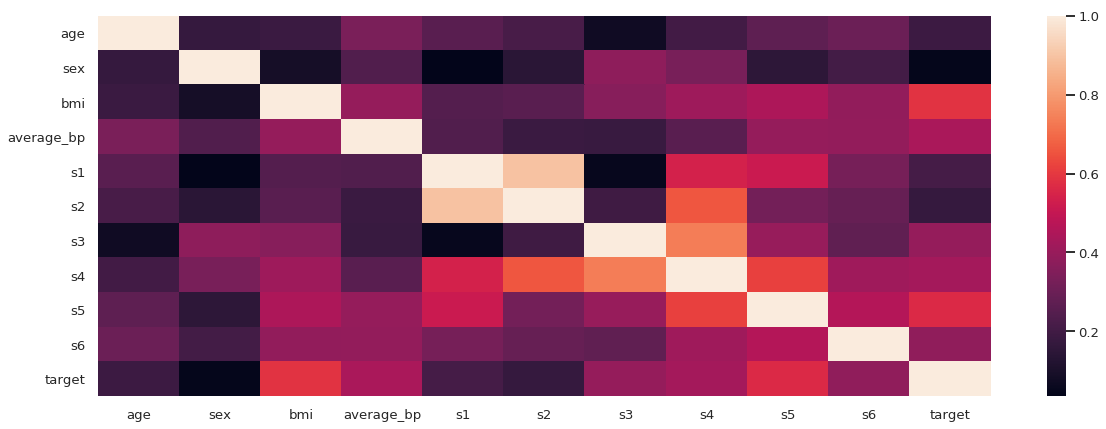

In [13]:
# check for highly correlated features
corr_matrix = diabetes.corr().abs()
sns.heatmap(corr_matrix);

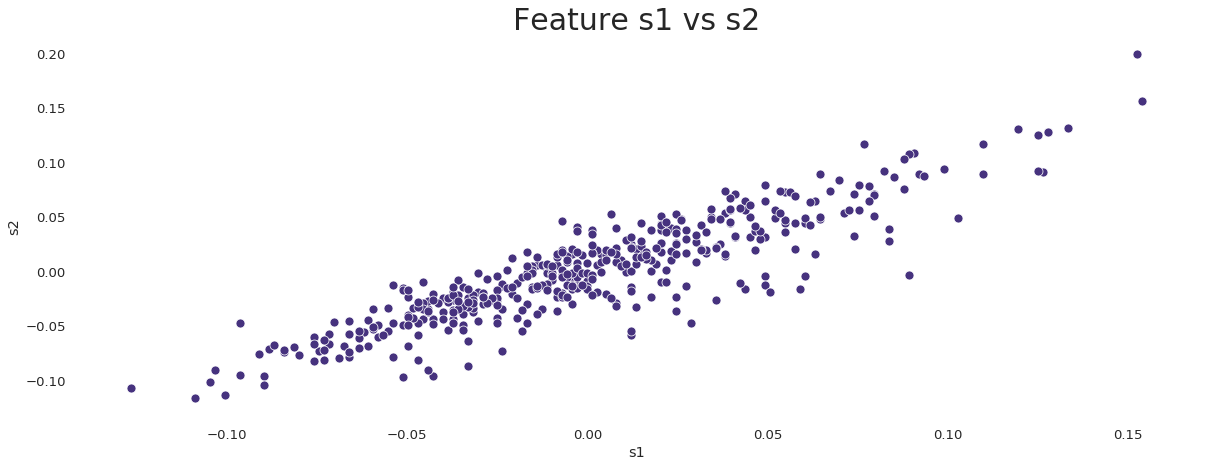

In [14]:
sns.scatterplot(x=diabetes.s1, y=diabetes.s2)
plt.title('Feature s1 vs s2', fontsize=30)
sns.despine(left=True, bottom=True)
plt.show()

In [15]:
# From https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['s2']

In [16]:
# Drop features 
diabetes = diabetes.drop(diabetes[to_drop], axis=1)